<a href="https://colab.research.google.com/github/yashveersinghsohi/machine_hack_competitions/blob/eda/Data_Science_Student_Championship/EDA/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cloning Git Repo

In [2]:
# !git clone -b eda https://github.com/yashveersinghsohi/machine_hack_competitions.git

# Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [6]:
ROOT_DIR = '/content/machine_hack_competitions/Data_Science_Student_Championship/Competition_Files/'
train = pd.read_csv(ROOT_DIR + 'train.csv')
test = pd.read_csv(ROOT_DIR + 'test.csv')

In [10]:
def df_shapes_eda(df):
  print('SHAPE OF DF', end=' ')
  print(df.shape)
  print('-'*30)
  print('TOP FEW ROWS')
  print('-'*30)
  print(df.head())
  print('-'*30)
  print('DF INFO')
  print('-'*30)
  print(df.info())
  print('-'*30)
  print('DF NULLS')
  print('-'*30)
  print((100*(df.isna().sum()/df.shape[0])).round(3))

In [11]:
df_shapes_eda(train)

SHAPE OF DF (209673, 8)
------------------------------
TOP FEW ROWS
------------------------------
   trip_duration  distance_traveled  num_of_passengers    fare  tip  \
0          748.0               2.75                1.0   75.00   24   
1         1187.0               3.43                1.0  105.00   24   
2          730.0               3.12                1.0   71.25    0   
3          671.0               5.63                3.0   90.00    0   
4          329.0               2.09                1.0   45.00   12   

   miscellaneous_fees  total_fare  surge_applied  
0               6.300     105.300              0  
1              13.200     142.200              0  
2              26.625      97.875              1  
3               9.750      99.750              0  
4              13.200      70.200              0  
------------------------------
DF INFO
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 

In [12]:
df_shapes_eda(test)

SHAPE OF DF (89861, 8)
------------------------------
TOP FEW ROWS
------------------------------
   trip_duration  distance_traveled  num_of_passengers  fare  tip  \
0         1076.0               4.18                1.0     0    0   
1          429.0               1.48                4.0     0    0   
2          856.0               4.15                1.0     0   24   
3          622.0               3.22                1.0     0   15   
4          507.0               3.98                1.0     0    0   

   miscellaneous_fees  total_fare  surge_applied  
0              13.500           0              0  
1              13.500           0              0  
2               6.000           0              0  
3               5.625           0              0  
4               2.250           0              0  
------------------------------
DF INFO
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89861 entries, 0 to 89860
Data columns (total 8 columns):
 # 

# EDA

## Train

In [22]:
train.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


### `trip_duration`

Seems to have large outliers

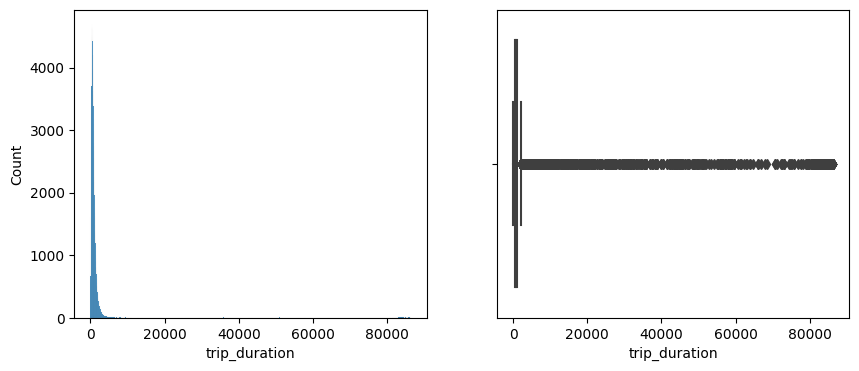

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(data=train, x='trip_duration', ax=ax[0])
sns.boxplot(data=train, x='trip_duration', ax=ax[1])
plt.show()

5% points are outliers according to the IQR definition

In [30]:
q25 = train['trip_duration'].quantile(0.25)
q75 = train['trip_duration'].quantile(0.75)
iqr = q75-q25
lower_iqr = q25 - (1.5*iqr)
upper_iqr = q75 + (1.5*iqr)

iqr, lower_iqr, upper_iqr, round(((train[(train['trip_duration'] < lower_iqr) | (train['trip_duration'] > upper_iqr)].shape[0]/train.shape[0])*100), 3)

(652.0, -532.0, 2076.0, 5.675)

Distribution is fairly normal without the IQR outliers

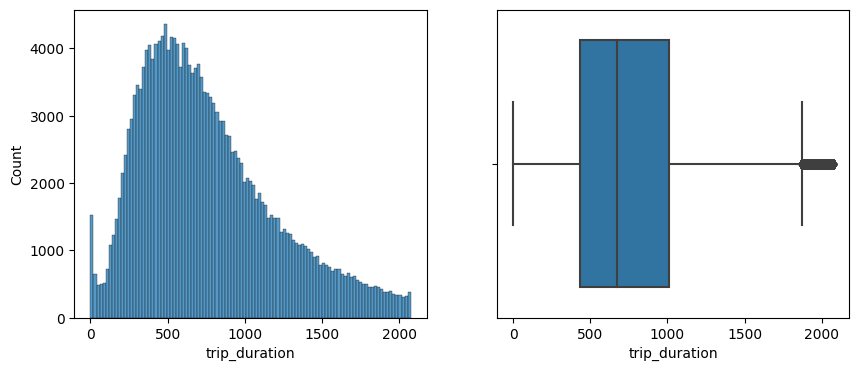

In [32]:
no_trip_duration_outliers = train[(train['trip_duration'] > lower_iqr) & (train['trip_duration'] < upper_iqr)]
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(data=no_trip_duration_outliers, x='trip_duration', ax=ax[0])
sns.boxplot(data=no_trip_duration_outliers, x='trip_duration', ax=ax[1])
plt.show()

In [39]:
train[train['trip_duration']==0].shape, round((train[train['trip_duration']==0].shape[0]/train.shape[0])*100, 3)

((33, 8), 0.016)

Checking if these trends replicate in the test set too or not.

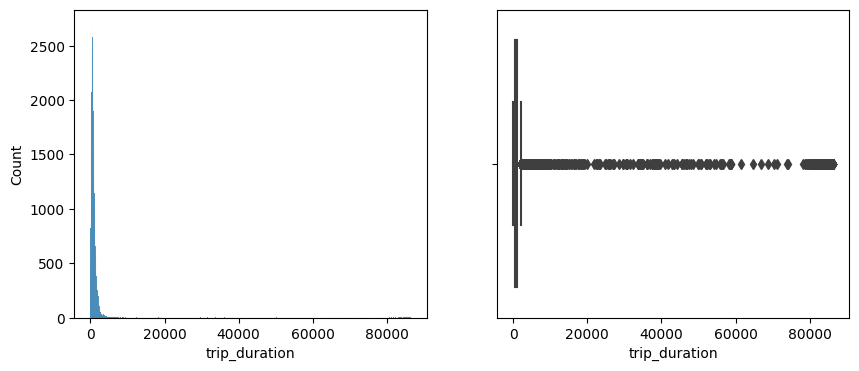

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(data=test, x='trip_duration', ax=ax[0])
sns.boxplot(data=test, x='trip_duration', ax=ax[1])
plt.show()

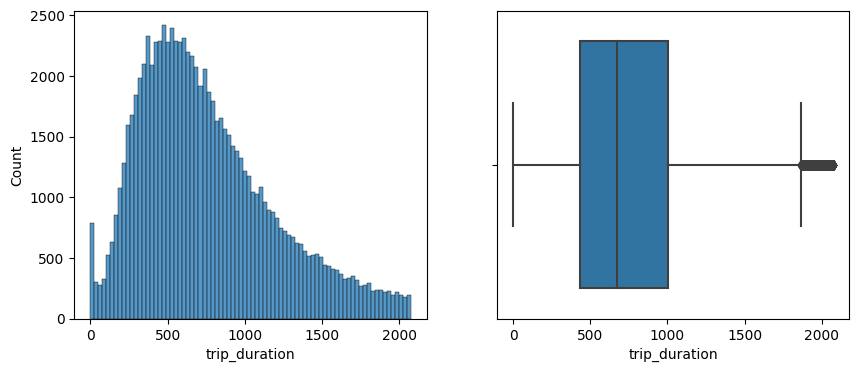

In [36]:
no_trip_duration_outliers_test = test[(test['trip_duration'] > lower_iqr) & (test['trip_duration'] < upper_iqr)]
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(data=no_trip_duration_outliers_test, x='trip_duration', ax=ax[0])
sns.boxplot(data=no_trip_duration_outliers_test, x='trip_duration', ax=ax[1])
plt.show()

In [37]:
round((test[(test['trip_duration'] < lower_iqr) | (test['trip_duration'] > upper_iqr)].shape[0] / test.shape[0])*100, 3)

5.532

In [40]:
test[test['trip_duration']==0].shape, round((test[test['trip_duration']==0].shape[0]/test.shape[0])*100, 3)

((12, 8), 0.013)